# W.H.O. World Wide Medical Staff Information

# Imports

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# The Data

In [2]:
df = pd.read_csv('med_staff_data.csv')

In [3]:
df.head()

,Country,Year,Medical doctors (per 10 000 population),Medical doctors (number),Generalist medical practitioners (number),Specialist medical practitioners (number),Medical doctors not further defined (number)
0,Afghanistan,2016,2.782,9842.0,NaN,NaN,9842.0
1,Afghanistan,2015,2.850,9808.0,NaN,NaN,9808.0
2,Afghanistan,2014,2.983,9954.0,NaN,NaN,9954.0
3,Afghanistan,2013,2.846,9184.0,NaN,NaN,9184.0
4,Afghanistan,2012,2.414,7521.0,NaN,NaN,7521.0


In [4]:
df.columns.unique()

Index(['Country', 'Year', 'Medical doctors (per 10 000 population)',
       'Medical doctors (number)', 'Generalist medical practitioners (number)',
       'Specialist medical practitioners (number)',
       'Medical doctors not further defined (number)'],
      dtype='object')

In [5]:
df.columns = ['country', 'year', 'docs_capita', 'no_docs', 'no_GMP', 'no_SMP','no_other']

In [6]:
df.head()

,country,year,docs_capita,no_docs,no_GMP,no_SMP,no_other
0,Afghanistan,2016,2.782,9842.0,NaN,NaN,9842.0
1,Afghanistan,2015,2.850,9808.0,NaN,NaN,9808.0
2,Afghanistan,2014,2.983,9954.0,NaN,NaN,9954.0
3,Afghanistan,2013,2.846,9184.0,NaN,NaN,9184.0
4,Afghanistan,2012,2.414,7521.0,NaN,NaN,7521.0


In [43]:
df.shape

(2848, 7)

In [7]:
special = df[['country', 'docs_capita', 'no_GMP', 'no_SMP']].copy()

In [8]:
special.dropna(inplace=True)

In [9]:
special.shape

(1004, 4)

<AxesSubplot:xlabel='docs_capita', ylabel='no_SMP'>

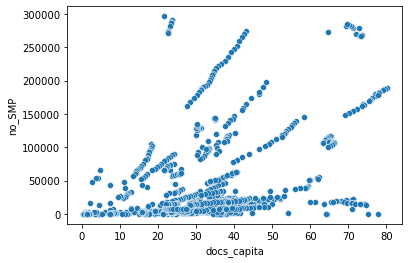

In [10]:
sns.scatterplot(data=special, x='docs_capita', y='no_SMP')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2848 entries, 0 to 2847
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   country      2848 non-null   object 
 1   year         2848 non-null   int64  
 2   docs_capita  2563 non-null   float64
 3   no_docs      2785 non-null   float64
 4   no_GMP       1127 non-null   float64
 5   no_SMP       1103 non-null   float64
 6   no_other     2321 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 155.9+ KB


In [12]:
df.describe()

,year,docs_capita,no_docs,no_GMP,no_SMP,no_other
count,2848.000000,2563.000000,2.785000e+03,1127.000000,1103.000000,2.321000e+03
mean,2004.340239,22.401461,7.580689e+04,17431.357587,38829.274705,6.458060e+04
std,10.371418,16.999494,2.167124e+05,25037.863030,59667.578155,2.212495e+05
min,1952.000000,0.126000,3.000000e+00,36.000000,19.000000,0.000000e+00
25%,1999.000000,7.853500,3.046000e+03,1937.000000,4650.500000,9.110000e+02
50%,2006.000000,21.562000,1.498400e+04,6071.000000,15162.000000,7.781000e+03
75%,2012.000000,33.076000,4.961200e+04,19656.500000,39691.000000,3.279100e+04
max,2019.000000,84.199000,2.828999e+06,194265.000000,296177.000000,2.828999e+06


In [13]:
print(df.shape)
print(df.isna().sum())

(2848, 7)
country           0
year              0
docs_capita     285
no_docs          63
no_GMP         1721
no_SMP         1745
no_other        527
dtype: int64


In [14]:
df1 = df.drop(columns = ['no_GMP', 'no_SMP'], axis =1)

In [15]:
df1.head()

,country,year,docs_capita,no_docs,no_other
0,Afghanistan,2016,2.782,9842.0,9842.0
1,Afghanistan,2015,2.850,9808.0,9808.0
2,Afghanistan,2014,2.983,9954.0,9954.0
3,Afghanistan,2013,2.846,9184.0,9184.0
4,Afghanistan,2012,2.414,7521.0,7521.0


# Exploratory Data Analysis

In [16]:
df1.dropna(inplace=True)

In [17]:
df1.shape

(2117, 5)

In [18]:
df1.isna().sum()

country        0
year           0
docs_capita    0
no_docs        0
no_other       0
dtype: int64

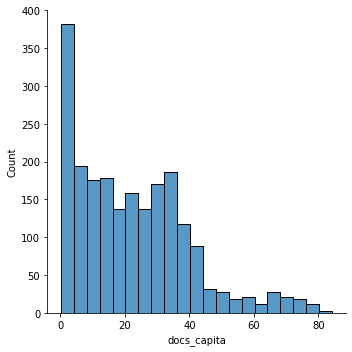

In [19]:
sns.displot(df1.docs_capita)

In [20]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2117 entries, 0 to 2846
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   country      2117 non-null   object 
 1   year         2117 non-null   int64  
 2   docs_capita  2117 non-null   float64
 3   no_docs      2117 non-null   float64
 4   no_other     2117 non-null   float64
dtypes: float64(3), int64(1), object(1)
memory usage: 99.2+ KB


In [21]:
new = df1[(df1['docs_capita'] <= 5)] 

In [22]:
new.shape

(411, 5)

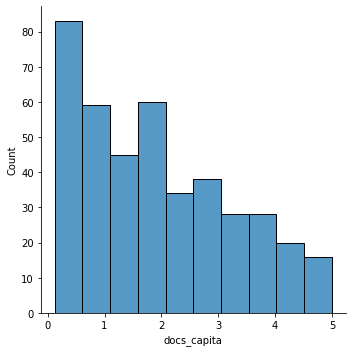

In [23]:
sns.displot(new.docs_capita)

In [24]:
new_plot = new.sort_values('docs_capita', ascending=False)
new_plot.head()

,country,year,docs_capita,no_docs,no_other
1786,Nicaragua,2005,4.996,2717.0,2717.0
195,Bangladesh,2016,4.974,78572.0,78572.0
1421,Lao People's Democratic Republic,2014,4.949,3286.0,3286.0
1785,Nicaragua,2006,4.924,2715.0,2715.0
1076,Guyana,2000,4.902,366.0,366.0


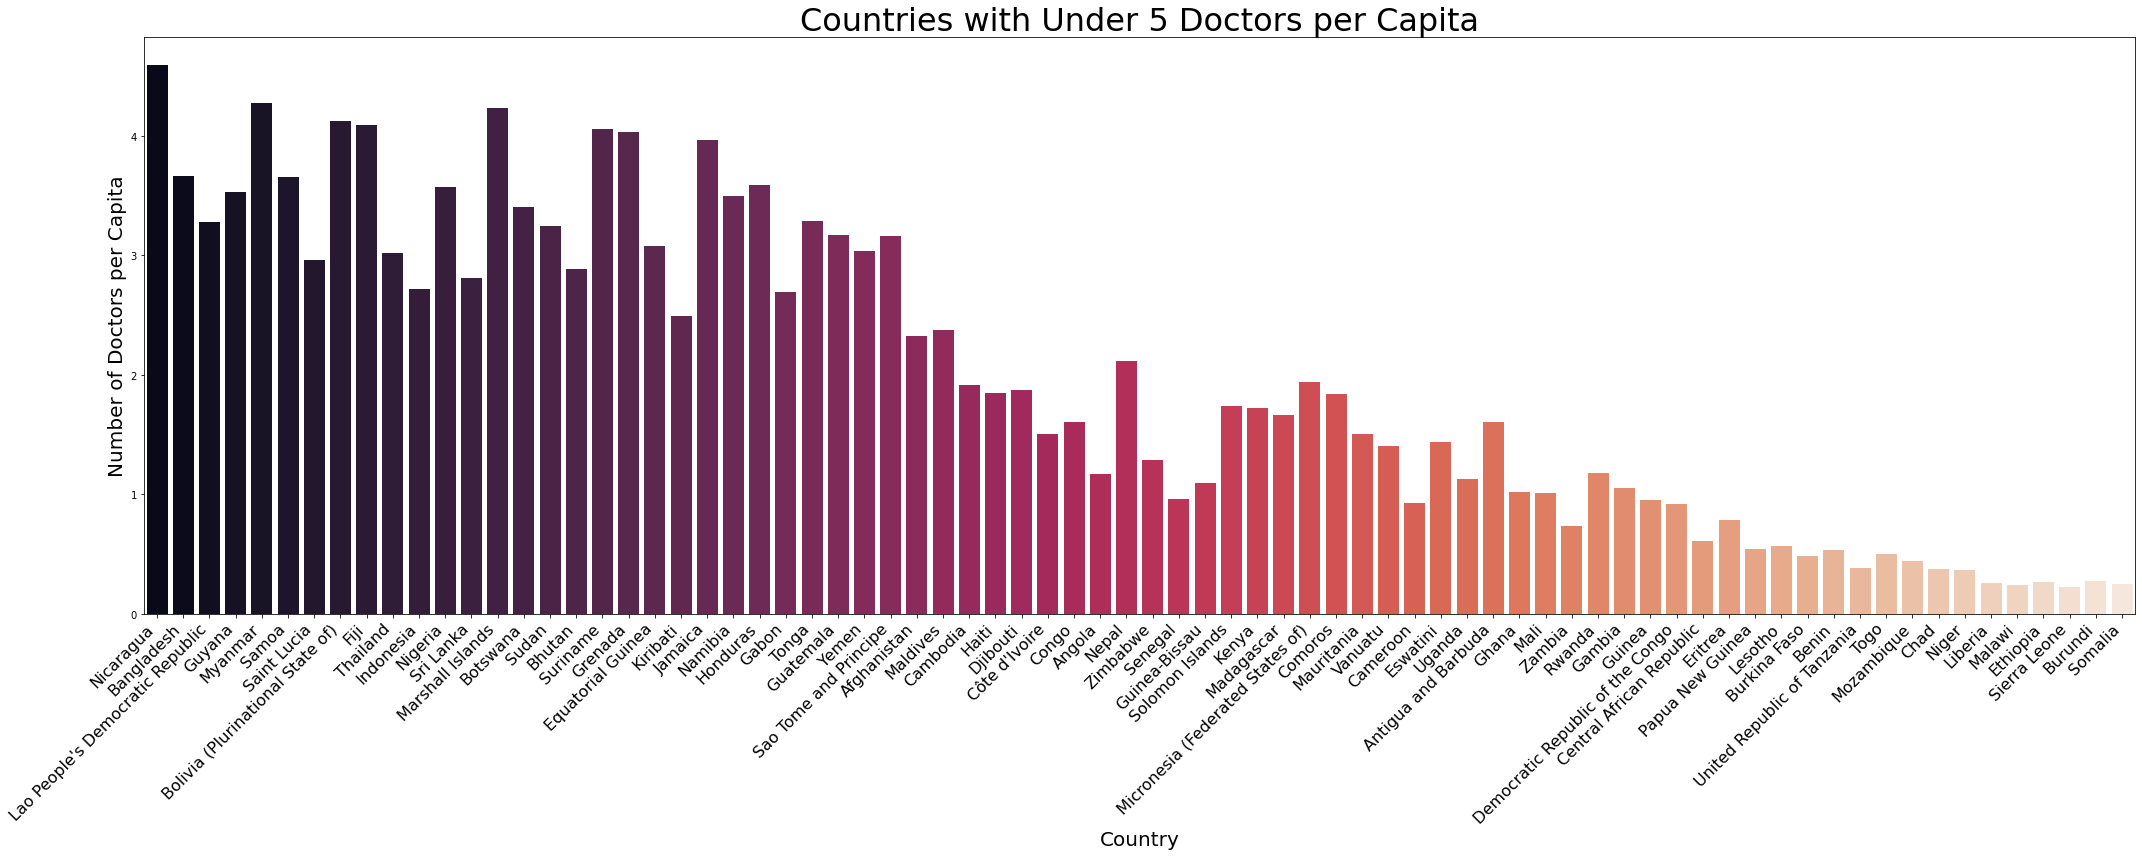

In [37]:
fix, ax = plt.subplots(figsize = (30,12))

g = sns.barplot(data=new_plot, x='country', y='docs_capita', ci=False, palette = 'rocket')
g.set_xticklabels(g.get_xticklabels(), rotation=45, ha='right', fontsize = 16)

plt.xlabel("Country", fontsize=20)
plt.ylabel("Number of Doctors per Capita", fontsize=20)
plt.title("Countries with Under 5 Doctors per Capita", fontsize=32)

plt.tight_layout()
plt.show()

In [33]:
developed = df1[(df1['docs_capita'] >= 40)] 

In [34]:
dev_plot = developed.sort_values('docs_capita', ascending=False)
dev_plot.head()
dev_plot.shape

(285, 5)

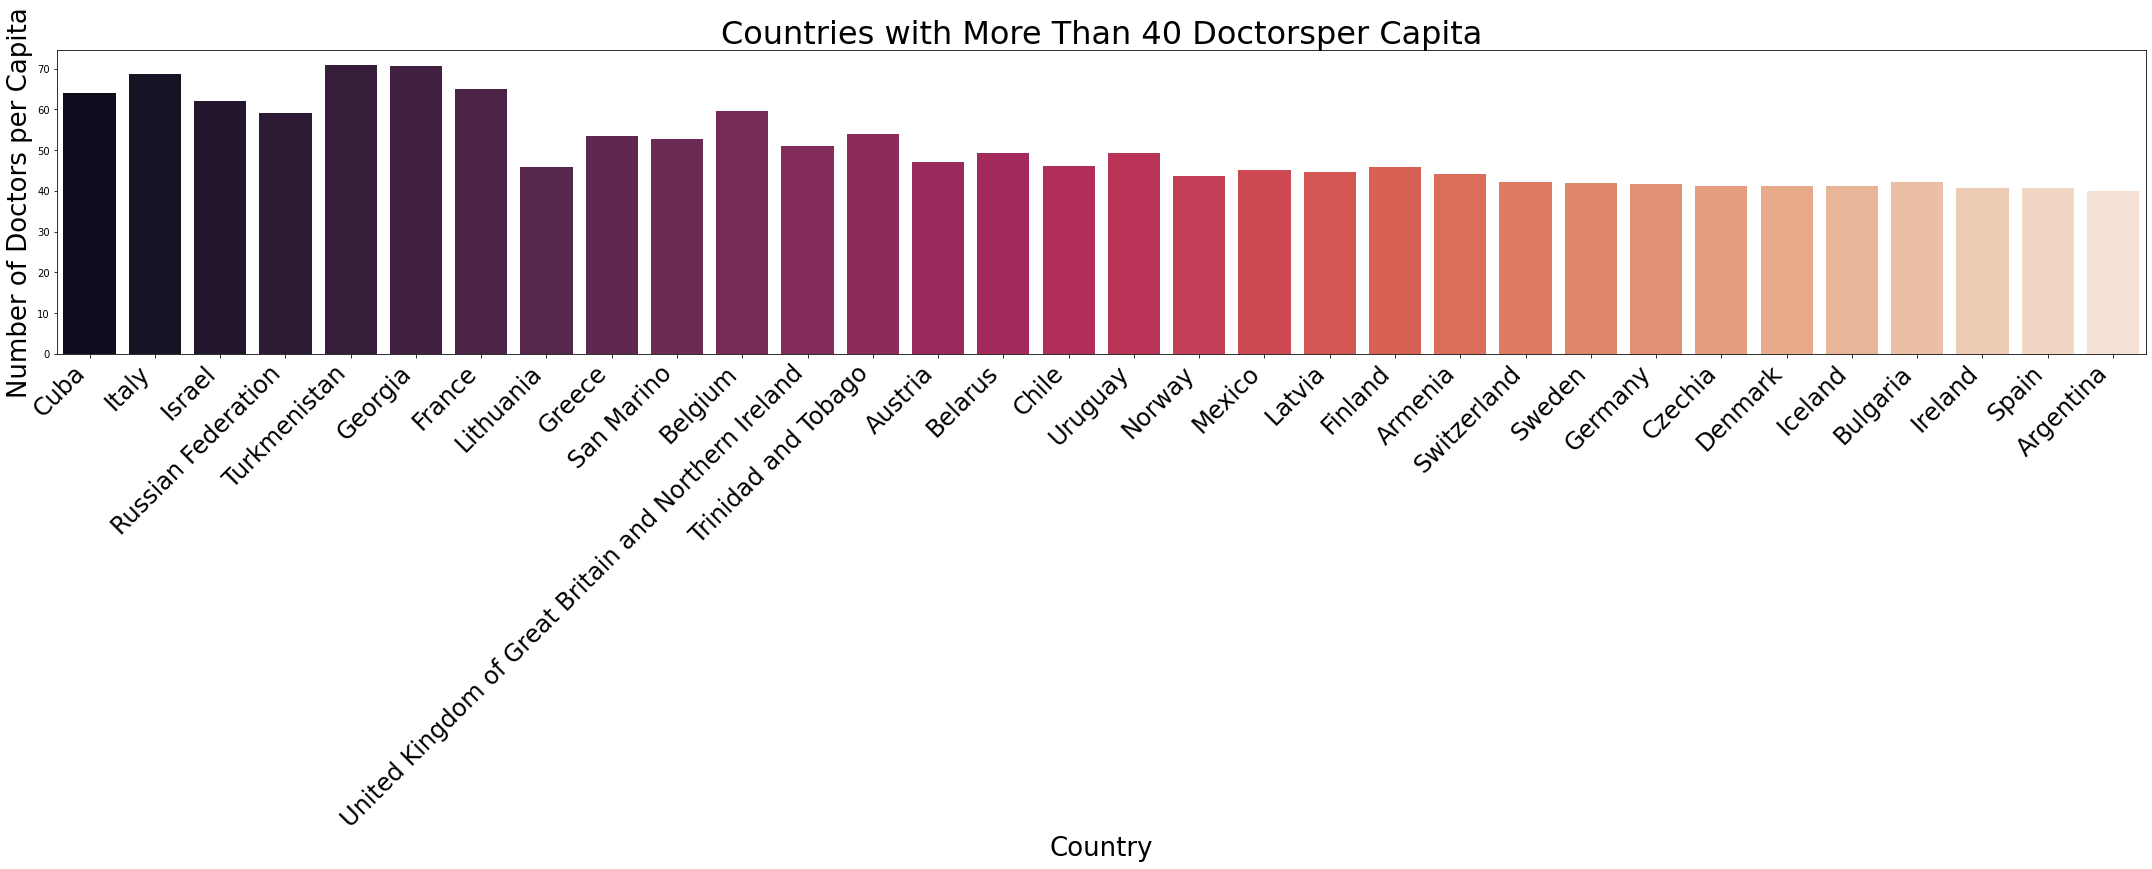

In [38]:
fix, ax = plt.subplots(figsize = (30,12))

g = sns.barplot(data=dev_plot, x='country', y='docs_capita', ci=False, palette = 'rocket')
g.set_xticklabels(g.get_xticklabels(), rotation=45, ha='right', fontsize = 24)

plt.xlabel("Country", fontsize=26)
plt.ylabel("Number of Doctors per Capita", fontsize=26)
plt.title("Countries with More Than 40 Doctorsper Capita", fontsize=32)

plt.tight_layout()
plt.show()

In [40]:
df.country.unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia (Plurinational State of)', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'Brunei Darussalam', 'Bulgaria',
       'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon',
       'Canada', 'Central African Republic', 'Chad', 'Chile', 'China',
       'Colombia', 'Comoros', 'Congo', 'Cook Islands', 'Costa Rica',
       "Côte d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czechia',
       "Democratic People's Republic of Korea",
       'Democratic Republic of the Congo', 'Denmark', 'Djibouti',
       'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon',
       'Gambia

In [42]:
for countries in df.country:
    if countries == "United States of America":
        print(df.docs_capita.count())

2563
2563
2563
2563
2563


In [45]:
special_1 = special[(special['no_SMP'] >= 10000)] 

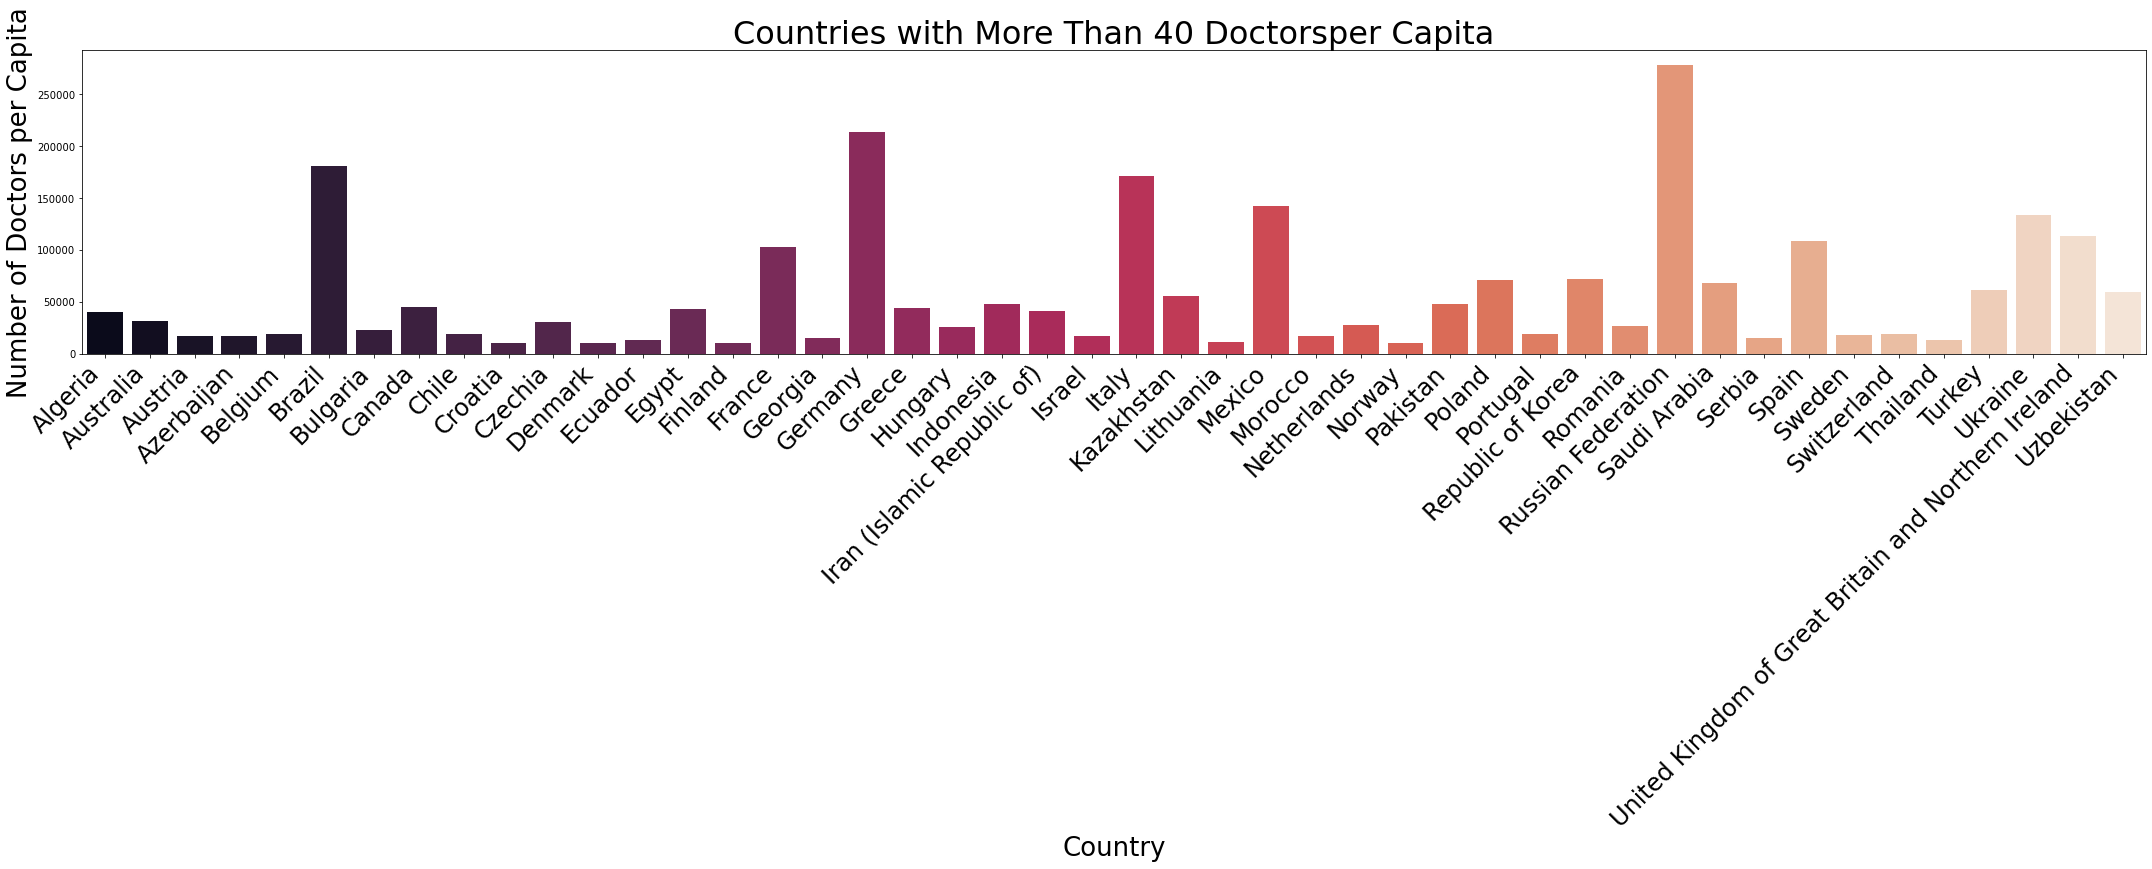

In [47]:
fix, ax = plt.subplots(figsize = (30,12))

g = sns.barplot(data=special_1, x='country', y='no_SMP', ci=False, palette = 'rocket')
g.set_xticklabels(g.get_xticklabels(), rotation=45, ha='right', fontsize = 24)

plt.xlabel("Country", fontsize=26)
plt.ylabel("Number of Doctors per Capita", fontsize=26)
plt.title("Countries with More Than 10,000 Specialist Practitioners", fontsize=32)

plt.tight_layout()
plt.show()

In [48]:
usa = df[(df['country'] == 'United States of America')]

In [50]:
print(usa)

                       country  year  docs_capita   no_docs  no_GMP  no_SMP  \
2763  United States of America  2018       26.036  851641.0     NaN     NaN   
2764  United States of America  2004       27.147  793648.0     NaN     NaN   
2765  United States of America  2000       25.942  730801.0     NaN     NaN   
2766  United States of America  1995       24.385  646610.0     NaN     NaN   
2767  United States of America  1985          NaN  525070.0     NaN     NaN   

      no_other  
2763  851641.0  
2764  793648.0  
2765  730801.0  
2766  646610.0  
2767  525070.0  
